# The Dataset:

## [Vertebral Column](https://archive.ics.uci.edu/ml/datasets/Vertebral+Column)

# The Problem:

## Predict who has a spinal abnormality

# What do we have?

## Several measurements (6) taken by doctors that are biomechanical indicators of back/spine/pelvis stuff

# Why?

## If you can just take those measurements and tell someone they have a back abnormality and that they need x/y/z medications WITHOUT SEEING A DOCTOR they would save \$$

## Import some stuff that is useful for doing fancy data science:

In [30]:
#modules for transforming data and generating machine learning models
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.externals.six import StringIO

## And for fancy visualizations:

In [16]:
#visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import pydot
from sklearn.tree import export_graphviz
sns.set(font_scale=1.3)

We are going to motivate this exploration of individual decision trees by looking at a dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Vertebral+Column).

The dataset is composed of 6 input measurement features:
  * pelvic incidence
  * pelvic tilt	
  * lumbar lordosis	angle
  * sacral slope	
  * pelvic radius
  * grade of spondylolisthesis (called spondy_grade in the dataset)
  
And 1 output variable (called outcome variable), that we are trying to predict:
  * outcome - can be either NO (normal) or AB (abnormal)

## Now lets get the data:

In [88]:
column_names = ["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle","sacral_slope","pelvic_radius","spondy_grade","outcome"]

vertebral_data = pd.read_csv("../data/vertebral_column_2_categories.dat", sep=" ",
                             names=column_names)
vertebral_data.head(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,spondy_grade,outcome
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
5,40.25,13.92,25.12,26.33,130.33,2.23,AB
6,53.43,15.86,37.17,37.57,120.57,5.99,AB
7,45.37,10.76,29.04,34.61,117.27,-10.68,AB
8,43.79,13.53,42.69,30.26,125.00,13.29,AB
9,36.69,5.01,41.95,31.68,84.24,0.66,AB


In [89]:
vertebral_data.outcome.value_counts()

AB    210
NO    100
Name: outcome, dtype: int64

In [90]:
feature_names = vertebral_data.columns.tolist()[:-1]
target_name = vertebral_data.columns.tolist()[-1]
print feature_names

['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'spondy_grade']


## Let's take a look at what we're working with:

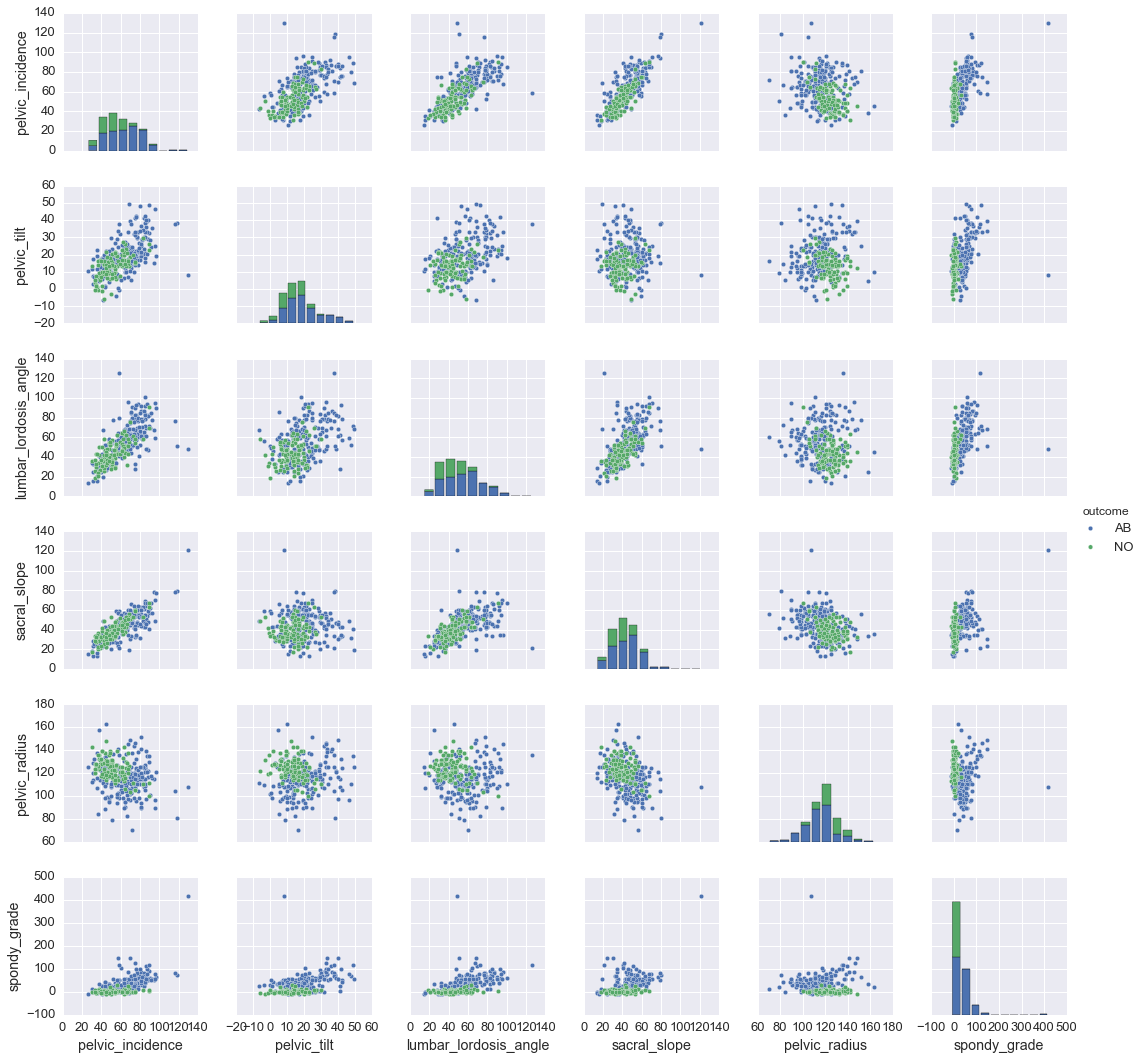

In [91]:
sns.pairplot(vertebral_data,hue="outcome")

## Lets look at one of the plots more closely:

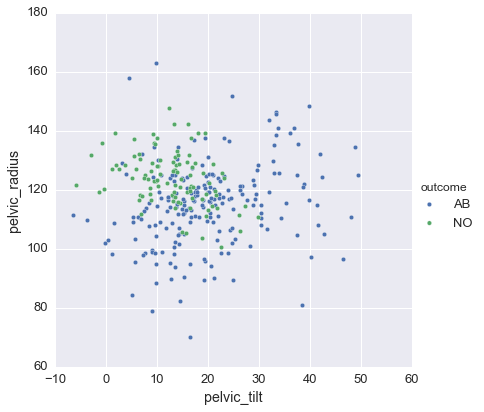

In [92]:
sns.pairplot(vertebral_data, x_vars=['pelvic_tilt'], y_vars=["pelvic_radius"],hue='outcome',size=6)

## Lets try to generate a decision tree model that takes the 6 input columns and attempts to predict whether a person has a spinal abnormality.

![Obama-Clinton decision tree](../images/obama_hillary_decision_tree.jpg)

## Before we build our model, we have to convert our outcome variable from a string to a numeric representaion, so lets do that quickly:

In [93]:
vertebral_data["outcome"] = (vertebral_data.outcome == "AB").astype(int)

In [94]:
vertebral_data.outcome

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
280    0
281    0
282    0
283    0
284    0
285    0
286    0
287    0
288    0
289    0
290    0
291    0
292    0
293    0
294    0
295    0
296    0
297    0
298    0
299    0
300    0
301    0
302    0
303    0
304    0
305    0
306    0
307    0
308    0
309    0
Name: outcome, dtype: int64

## Furthermore, in order to test the performance of our model on data "in the wild" lets generate train/test splits of our data (90% training/10% testing):

In [95]:
X,y = vertebral_data[feature_names],vertebral_data[target_name]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.1,random_state=12)

## Now lets build our model and check its performance on the test dataset (using **accuracy**).

## *Accuracy*, is simply the fraction of samples in the test data set that the classifier got correct.

In [96]:
decision_tree = DecisionTreeClassifier(max_depth=2,random_state=12)
decision_tree.fit(X_train,y_train)
print "Decision Tree accuracy:",accuracy_score(y_test,decision_tree.predict(X_test))

Decision Tree accuracy: 0.741935483871


In [98]:
decision_tree.predict(X_test)

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1])

In [68]:
decision_tree.predict(X_test)

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1])

## Lets visualize our decision tree to understand how it's making a decision:

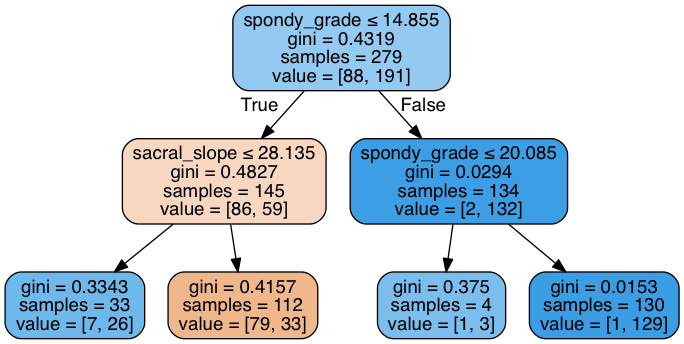

In [99]:
#This allows us to make a decision tree real fast directly in the notebook!
dot_data = StringIO()  
export_graphviz(decision_tree, out_file=dot_data,  
                    feature_names=X_train.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

## Heres how you would read the decision tree:

### - $R_1$: spondy_grade with value less than or equal to 14.855 and sacral slope less than or equal to 28.135 is predicted to have a spinal abnormality
### - $R_2$: spondy_grade with value less than or equal to 14.855 and sacral slope more than 28.135 is predicted to not have have a spinal abnormality
### - $R_3$: spondy_grade with value greater than 14.855 is predicted to have the abnormality

### This tree is used to make predictions on **out-of-sample data**.

## Can we do better than this?


## OF COURSE WE CAN.

## ANY IDEAS HOW?

# BUILD A BUNCH OF DECISION TREES ON RANDOM SUBSETS OF THE DATA AND TAKE THEIR AVERAGE PREDICTION


# THIS IS CALLED BAGGING (BOOTSTRAP AGGREGATING). LETS DO THAT WITH 20 TREES AT FIRST

In [100]:
# set a seed for reproducibility
np.random.seed(1234)

# create ten bootstrap samples (will be used to select rows from the DataFrame)

samples = [np.random.choice(a=X_train.shape[0], size=X_train.shape[0], replace=True) for _ in range(1, 21)]
samples

[array([211,  53, 204, 152, 143, 177, 233, 154,  30, 171, 158, 236, 120,
        246,  50, 240, 251,  76, 195, 231, 139, 128, 233,   3, 258, 275,
        107,  14, 243, 107,  81, 269, 116,  96, 197, 113, 159, 249,  89,
         84,  45,  16,  41, 236,  86, 177,  18,  85, 174, 135, 195, 238,
         47, 244, 175,  34,  10,   4,  82, 103, 235, 151, 249,  62, 183,
        105, 256, 121, 249, 277, 196, 119, 250, 114,   1, 142, 259, 201,
        275,  26,  68, 150, 136, 172, 241, 233,  15, 107, 130, 242,  79,
        195,  46,  88, 161, 170,   2, 212, 274, 117,  81, 208,   8,  75,
         15, 276, 272,  61, 126, 211,  49, 211, 155, 233, 164,  84,  28,
        257, 267, 190, 145,  98,  56,  12,   8, 237, 277, 150,  19,  41,
         39, 210, 165,  98,  87,  38, 182, 145,  41, 147,  35, 107, 130,
        232,  65, 217,  68, 259, 209, 175,  32,  48, 105,  83, 245, 137,
         60, 178, 106, 199, 209, 260,   3, 127,  88,  46,  94,  63,  84,
          5, 211,  72, 184,  14, 227, 264,  41, 161

In [101]:
# grow each tree deep
treereg = DecisionTreeClassifier(max_depth=None, random_state=1)

# list for storing predicted compressive strength from each tree
predictions = []

# define testing data
X_test_boot = X_test
y_test_boot = y_test

# grow one tree for each bootstrap sample and make predictions on testing data
for sample in samples:
    X_train_boot = X_train.iloc[sample, :]
    y_train_boot = y_train.iloc[sample]
    treereg.fit(X_train_boot, y_train_boot)
    y_pred_boot = treereg.predict(X_test_boot)
    predictions.append(y_pred_boot)

# convert predictions from list to NumPy array
predictions = np.array(predictions)
predictions

array([[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1],
       [1,

In [102]:
# calculate accuracy for bagged regression trees
y_pred_boot = (np.mean(predictions, axis=0) > .5).astype(int)
print "Bagged accuracy:",accuracy_score(y_test_boot, y_pred_boot)

#calculate accuracy for single decision tree with same exact parameters as each tree in the bag
single_tree = DecisionTreeClassifier(max_depth=None, random_state=1)
single_tree.fit(X_train,y_train)
y_pred_single = single_tree.predict(X_test)
print "Single Tree accuracy:",accuracy_score(y_test_boot, y_pred_single)

Bagged accuracy: 0.806451612903
Single Tree accuracy: 0.774193548387


## or you can do the same thing in way fewer lines:

In [103]:
bagreg = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, bootstrap=True, oob_score=True, random_state=1234)
# fit and predict
bagreg.fit(X_train, y_train)
y_pred_bag = bagreg.predict(X_test)

print "Bagged accuracy with 100 trees:",accuracy_score(y_test, y_pred_bag)

Bagged accuracy with 100 trees: 0.838709677419
